LINEAR REGRESSION WITH FEATURE SELECTION USING SELECTKBEST METHOD

Selected features with 1 features: 
['age']

Training set results:
R2 score: 0.056415330775659855
RMSE: 75.47582329537437
Mean Squared Error: 5696.599902114577

Test set results:
R2 score: 0.020483234523109295
RMSE: 75.72274706070324
Mean Squared Error: 5733.934422419242



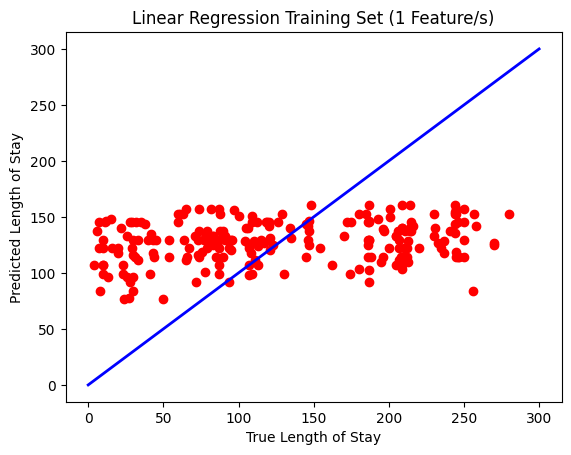

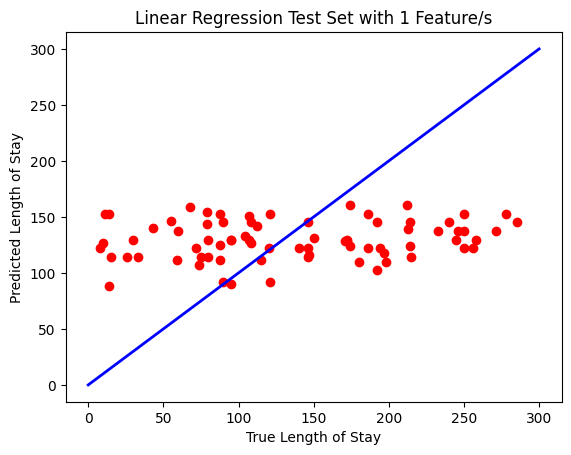

Selected features with 2 features: 
['age', 'high_blood_pressure']

Training set results:
R2 score: 0.08011069648699232
RMSE: 74.52212072851799
Mean Squared Error: 5553.5464778758105

Test set results:
R2 score: 0.07313959333315256
RMSE: 73.65930031545683
Mean Squared Error: 5425.692522962659



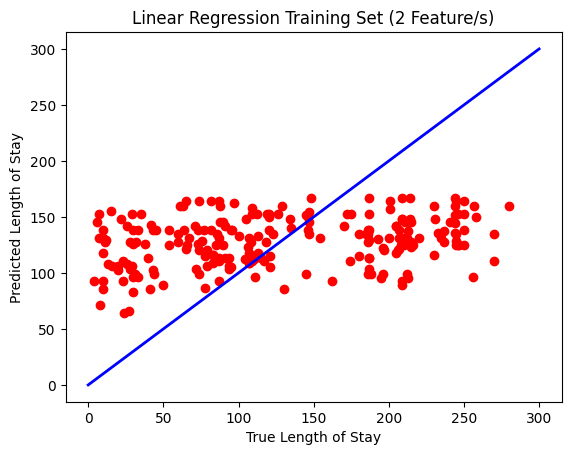

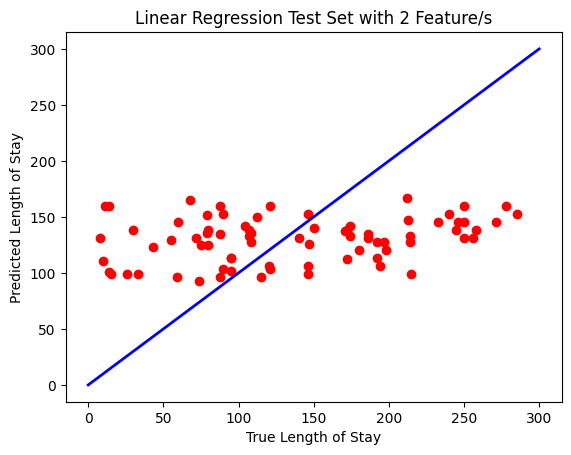

Selected features with 3 features: 
['age', 'high_blood_pressure', 'serum_creatinine']

Training set results:
R2 score: 0.09642469861628356
RMSE: 73.85834920866476
Mean Squared Error: 5455.05574782907

Test set results:
R2 score: 0.0805114384517236
RMSE: 73.36578849255123
Mean Squared Error: 5382.538921133762



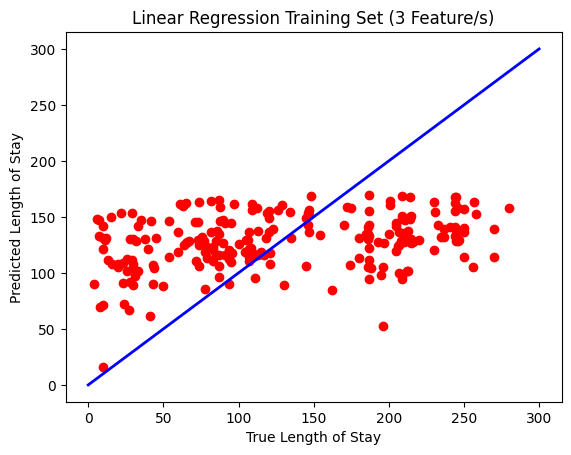

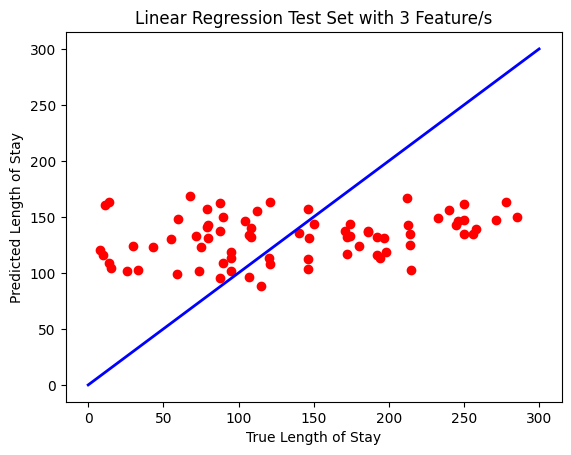

Selected features with 4 features: 
['age', 'anaemia', 'high_blood_pressure', 'serum_creatinine']

Training set results:
R2 score: 0.11135520721491132
RMSE: 73.24559666663254
Mean Squared Error: 5364.917431051012

Test set results:
R2 score: 0.08642886562743224
RMSE: 73.1293323450687
Mean Squared Error: 5347.899249235512



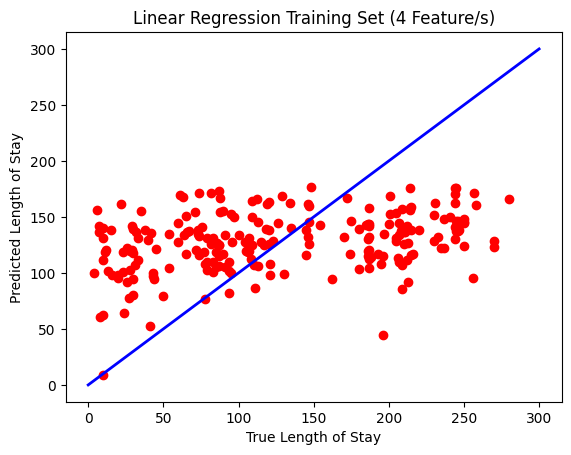

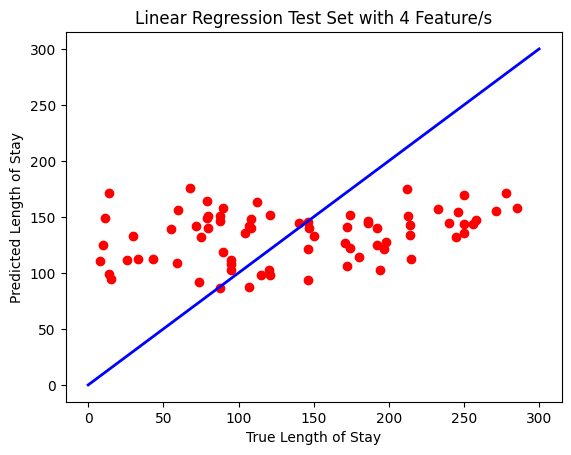

Selected features with 5 features: 
['age', 'anaemia', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium']

Training set results:
R2 score: 0.11479325183336186
RMSE: 73.10377078208494
Mean Squared Error: 5344.161302559616

Test set results:
R2 score: 0.09469034699865675
RMSE: 72.79792482705385
Mean Squared Error: 5299.537859125383



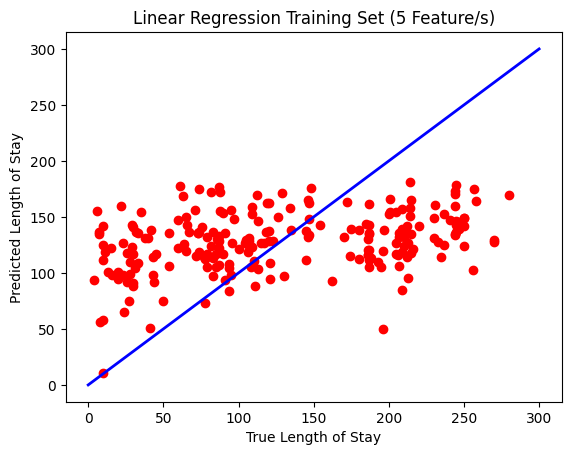

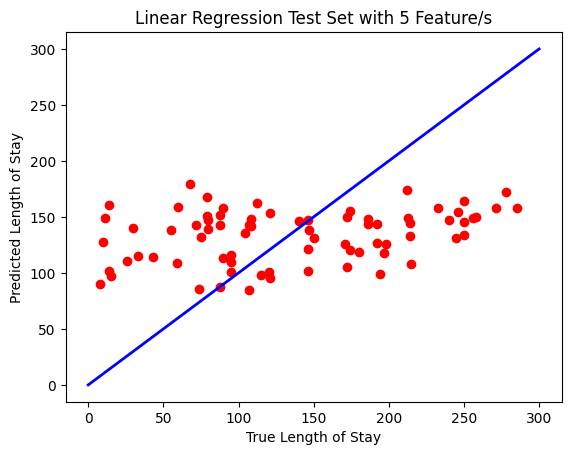

Selected features with 6 features: 
['age', 'anaemia', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium']

Training set results:
R2 score: 0.12101821356325326
RMSE: 72.84627667926607
Mean Squared Error: 5306.580026032183

Test set results:
R2 score: 0.04925097766155606
RMSE: 74.60249765876259
Mean Squared Error: 5565.532656925677



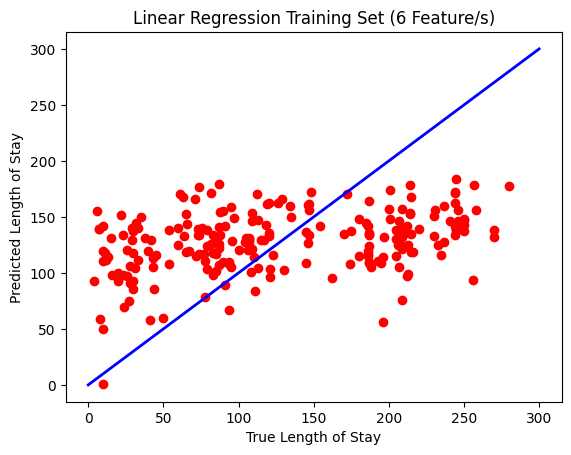

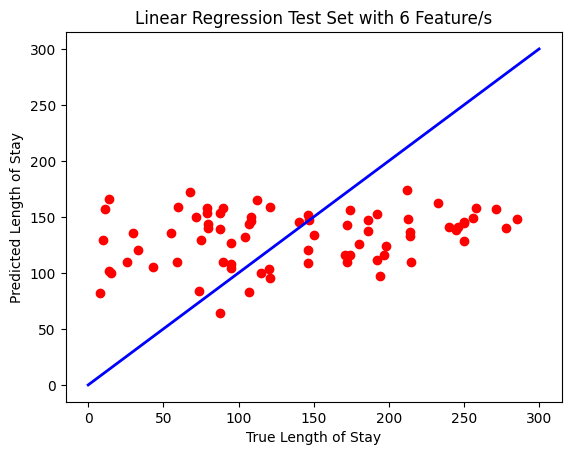

Selected features with 7 features: 
['age', 'anaemia', 'creatinine_phosphokinase', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium']

Training set results:
R2 score: 0.13184240102390676
RMSE: 72.39635591690539
Mean Squared Error: 5241.232350047243

Test set results:
R2 score: 0.030508564668700444
RMSE: 75.3342401820034
Mean Squared Error: 5675.247743799775



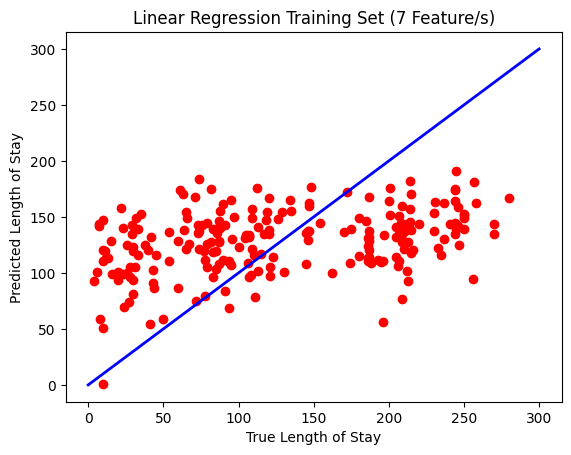

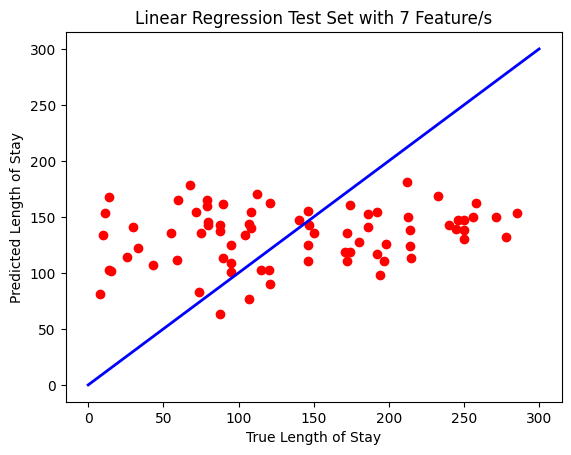

Selected features with 8 features: 
['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium']

Training set results:
R2 score: 0.13184368507496513
RMSE: 72.39630237786369
Mean Squared Error: 5241.224597987071

Test set results:
R2 score: 0.030358306808412894
RMSE: 75.34007784222578
Mean Squared Error: 5676.12732927264



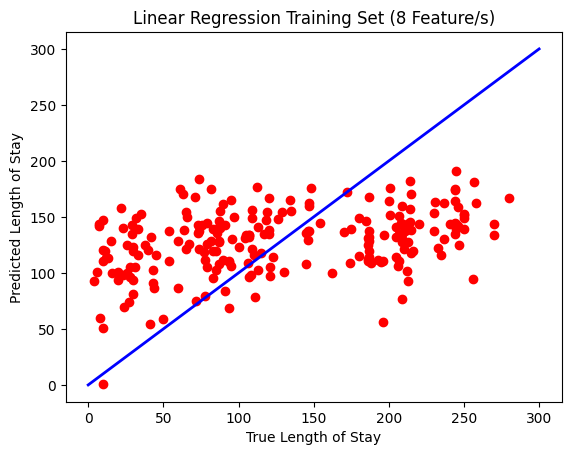

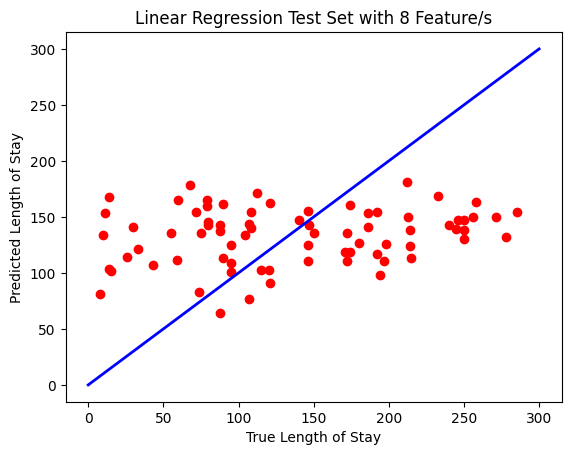

Selected features with 9 features: 
['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium']

Training set results:
R2 score: 0.13184558677113634
RMSE: 72.39622308577995
Mean Squared Error: 5241.2131170860175

Test set results:
R2 score: 0.030890378396652318
RMSE: 75.31940432137353
Mean Squared Error: 5673.01266732654



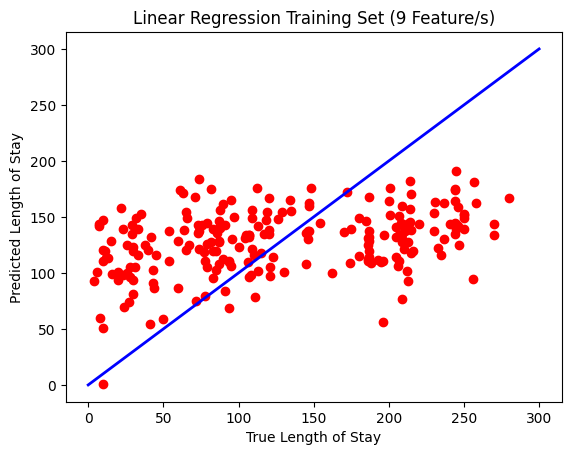

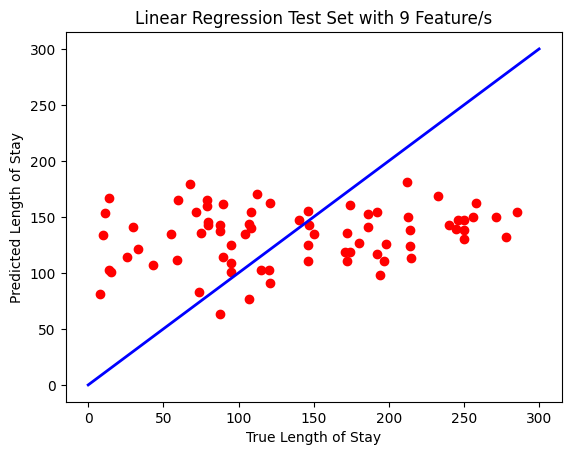

Selected features with 10 features: 
['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex']

Training set results:
R2 score: 0.13184944222822348
RMSE: 72.39606233048285
Mean Squared Error: 5241.189840959157

Test set results:
R2 score: 0.030486999291335137
RMSE: 75.33507804514714
Mean Squared Error: 5675.373984068411



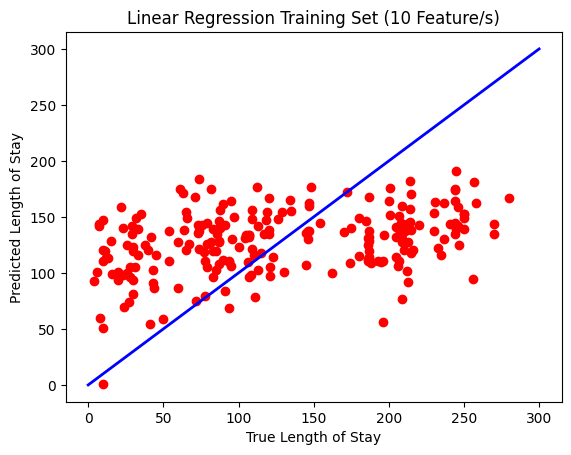

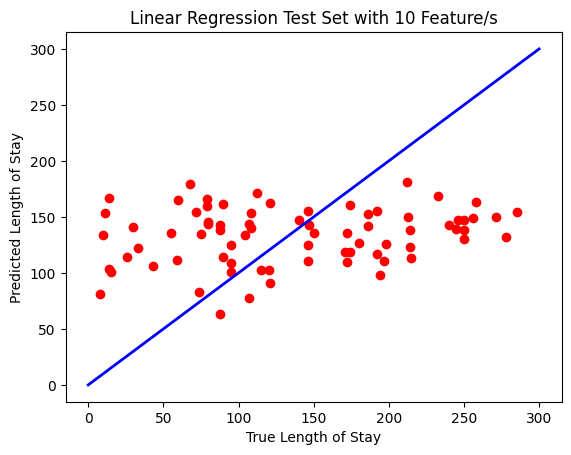

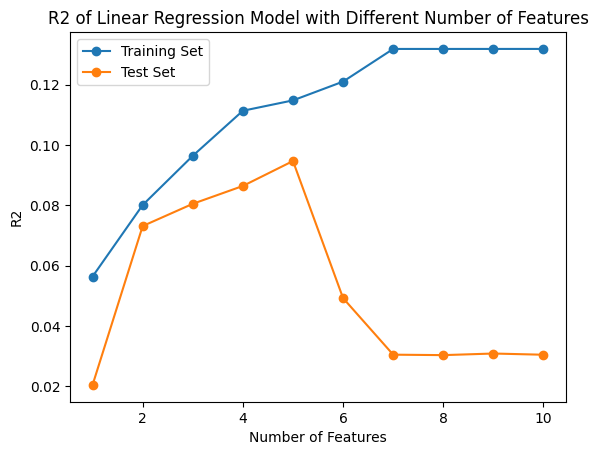

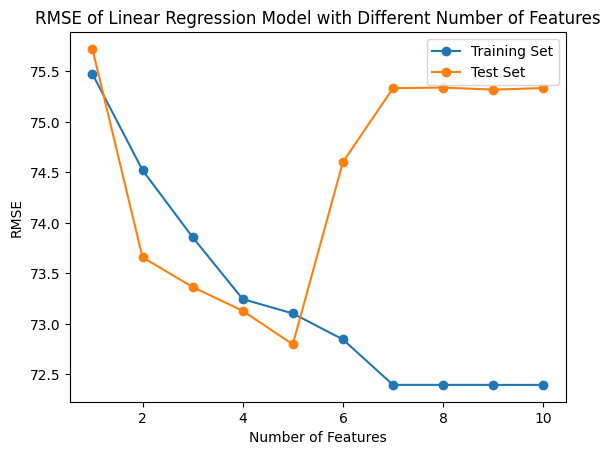

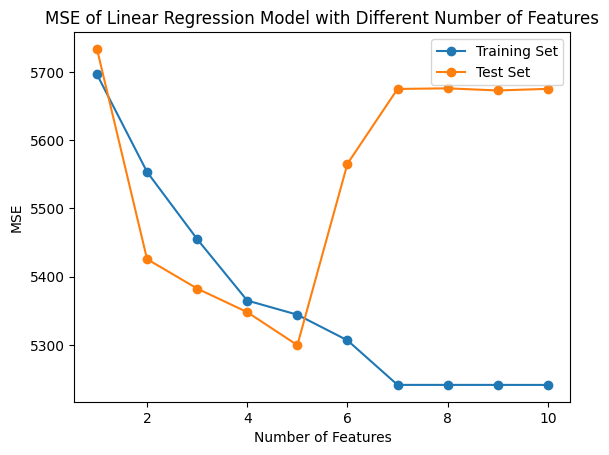


Feature rankings:
         Rank                   Columns
0   13.273004                       age
5    7.549870       high_blood_pressure
7    6.175328          serum_creatinine
1    4.831168                   anaemia
8    1.261974              serum_sodium
6    1.208717                 platelets
2    0.409346  creatinine_phosphokinase
3    0.173848                  diabetes
4    0.005651         ejection_fraction
9    0.002741                       sex
10   0.002003                   smoking


<Axes: title={'center': 'Feature Rankings'}, xlabel='Columns'>

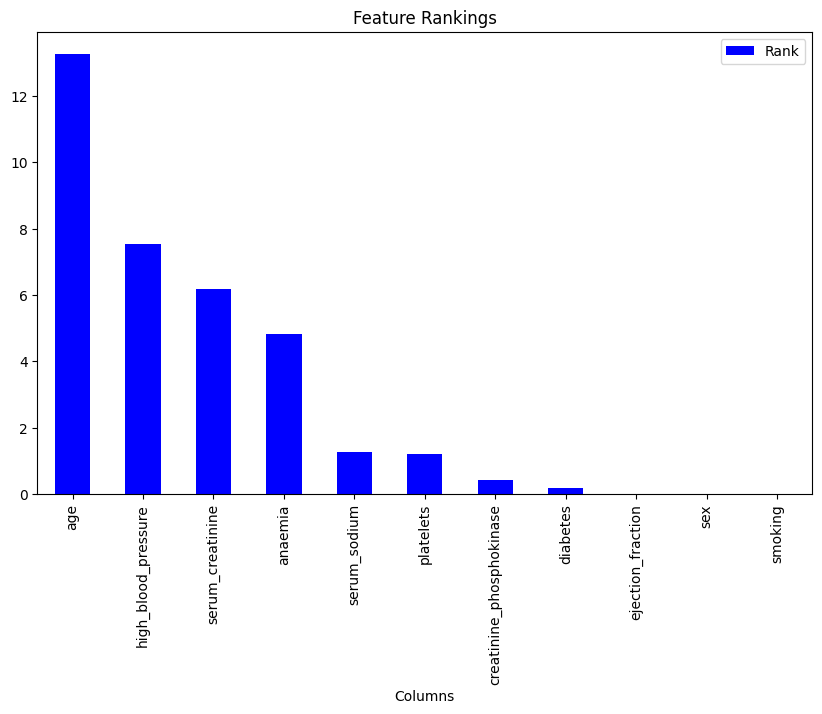

In [ ]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

# Import the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Split the data into predictor variables (X) and target variable (y)
X = df.drop(['DEATH_EVENT', 'time'], axis=1) # Remove 'DEATH_EVENT' as it is not related to length of stay
y = df['time']

# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Feature ranking and selection
model = LinearRegression()

# Create empty lists for storing R2, RMSE and MSE scores
train_r2_list = []
test_r2_list = []
train_rmse_list = []
test_rmse_list = []
train_mse_list = []
test_mse_list = []

# Test the performance of the model using different number of features
num_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in num_features:
    # Select top i features
    kbest = SelectKBest(f_regression, k=i)
    X_train_kbest = kbest.fit_transform(X_train, y_train)
    X_test_kbest = kbest.transform(X_test)

     # Print selected features
    selected_features = X_train.columns[kbest.get_support()]
    print(f"Selected features with {i} features: \n{list(selected_features)}")

    # Train the model using top i features
    lr = LinearRegression()
    lr.fit(X_train_kbest, y_train)

    # Predict the test and train set results
    y_test_pred = lr.predict(X_test_kbest)
    y_train_pred = lr.predict(X_train_kbest)


    # Calculate RMSE and R2 scores for the test and train sets
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)


    # Print results for current iteration
    print("\nTraining set results:")
    print(f"R2 score: {train_r2}")
    print(f"RMSE: {train_rmse}")
    print(f"Mean Squared Error: {train_mse}\n")

    print("Test set results:")
    print(f"R2 score: {test_r2}")
    print(f"RMSE: {test_rmse}")
    print(f"Mean Squared Error: {test_mse}\n")


    # Append the RMSE scores to the lists
    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)
    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

    # Visualizing the training set
    plt.scatter(y_train, y_train_pred, color = 'red')
    plt.plot([0, 300], [0, 300], color='blue', linewidth=2)
    plt.title(f'Linear Regression Training Set ({i} Feature/s)')
    plt.xlabel('True Length of Stay')
    plt.ylabel('Predicted Length of Stay')
    plt.show()

    # Visualizing the test set
    plt.scatter(y_test, y_test_pred, color = 'red')
    plt.plot([0, 300], [0, 300], color='blue', linewidth=2)
    plt.title(f'Linear Regression Test Set with {i} Feature/s')
    plt.xlabel('True Length of Stay')
    plt.ylabel('Predicted Length of Stay')
    plt.show()

# Visualize the R2 performance of the model using different number of features
plt.plot(num_features, train_r2_list, label='Training Set', marker='o')
plt.plot(num_features, test_r2_list, label='Test Set', marker='o')
plt.title('R2 of Linear Regression Model with Different Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('R2')
plt.legend()
plt.show()

# Visualize the RMSE performance of the model using different number of features
plt.plot(num_features, train_rmse_list, label='Training Set', marker='o')
plt.plot(num_features, test_rmse_list, label='Test Set', marker='o')
plt.title('RMSE of Linear Regression Model with Different Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Visualize the MSE performance of the model using different number of features
plt.plot(num_features, train_mse_list, label='Training Set', marker='o')
plt.plot(num_features, test_mse_list, label='Test Set', marker='o')
plt.title('MSE of Linear Regression Model with Different Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('MSE')
plt.legend()
plt.show()


# Visualizing the feature rankings
scores, pvalues = f_regression(X_train, y_train)
ranking = pd.DataFrame({'Rank': scores, 'Columns': X_train.columns})
ranking = ranking.sort_values('Rank', ascending=False)
print("\nFeature rankings:")
print(ranking)
ranking.plot(kind='bar', x='Columns', y='Rank', figsize=(10,6), color='blue', title='Feature Rankings')




LOGISTIC REGRESSION WITH FEATURE SELECTION USING SELECTKBEST METHOD

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

#Loading the dataset into a dataframe
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head(10)
df.describe()




,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Checking for missing values and outliers

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


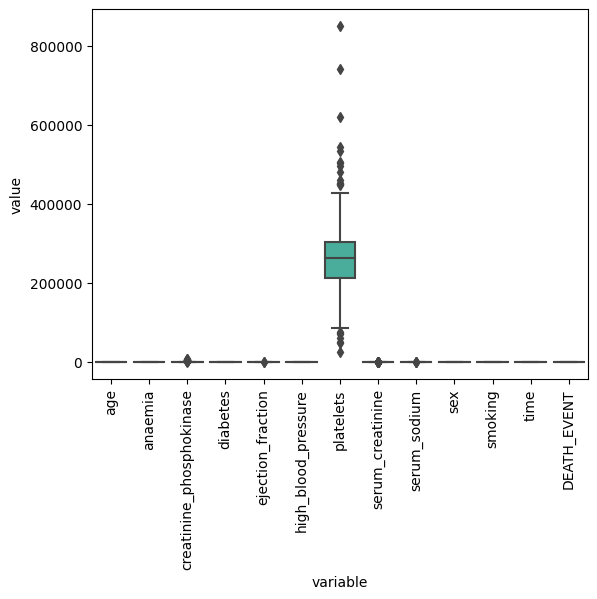

In [ ]:
print(df.isnull().sum())

sns.boxplot(x='variable', y='value', data=pd.melt(df[df.columns[0:13]]))
plt.xticks(rotation=90)
plt.show()

Checking correlation between features

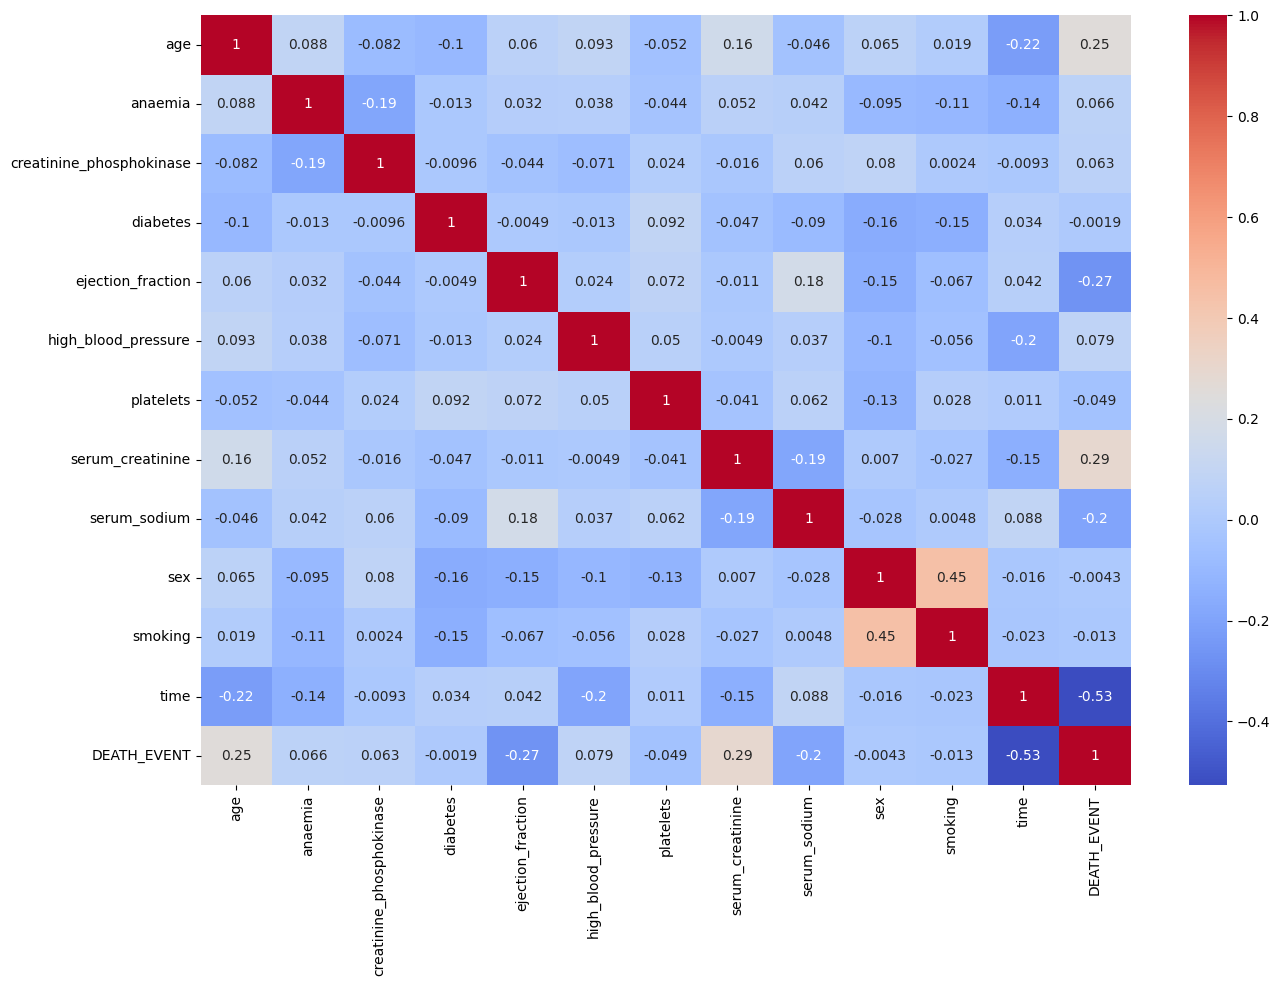

<Axes: >

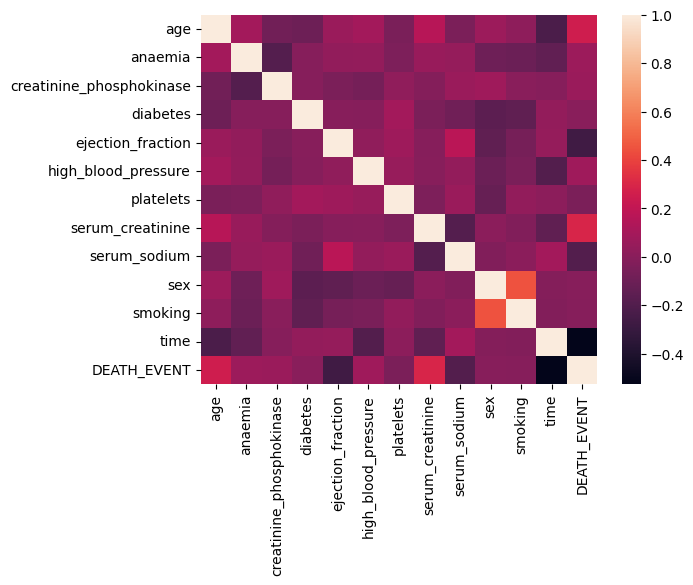

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


corr = df.corr()
sns.heatmap(corr,
xticklabels=corr.columns.values,
yticklabels=corr.columns.values)

Separating input and output columns

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

Standardizing the features using StandarScaler

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

Splitting the dataset into training and test sets and setting test size to 20 percent

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Feature ranking using SelectKBest method

In [ ]:
selector = SelectKBest(f_classif, k=2)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)


Visualization of the rankings of the features

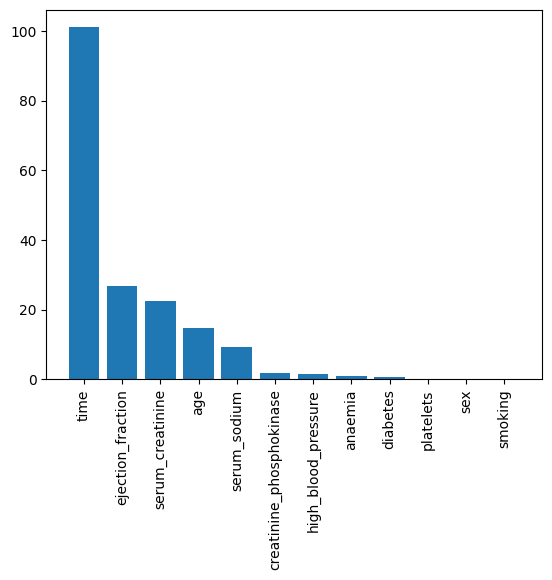

Selected features: ['ejection_fraction', 'time']


In [ ]:
scores = selector.scores_
features = df.columns[:-1]
sorted_indices = np.argsort(scores)[::-1]
sorted_scores = scores[sorted_indices]
sorted_features = features[sorted_indices]
plt.bar(range(len(features)), sorted_scores)
plt.xticks(range(len(features)), sorted_features, rotation=90)
plt.show()

mask = selector.get_support()
features = df.columns[:-1]
selected_features = list(features[mask])

# Print the selected features
print("Selected features:", selected_features[:2])

Building the logistic regression model using the selected features

In [ ]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Make predictions & classification report

In [ ]:
y_pred = classifier.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy:  0.75
              precision    recall  f1-score   support

           0       0.73      0.95      0.82        37
           1       0.83      0.43      0.57        23

    accuracy                           0.75        60
   macro avg       0.78      0.69      0.70        60
weighted avg       0.77      0.75      0.73        60



Confusion Matrix

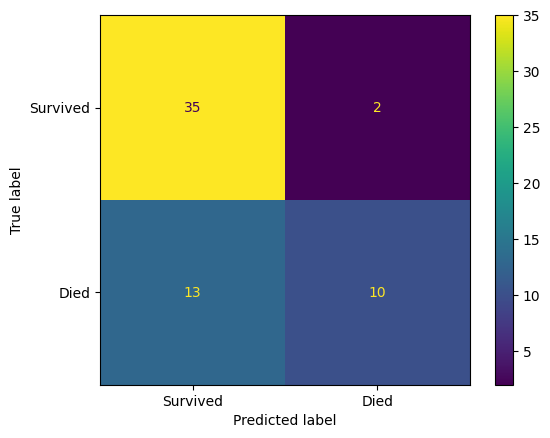

In [ ]:
# Plot the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Survived', 'Died'])
cmd.plot()

Plotting the decision boundary

<ipython-input-28-948872360a69>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


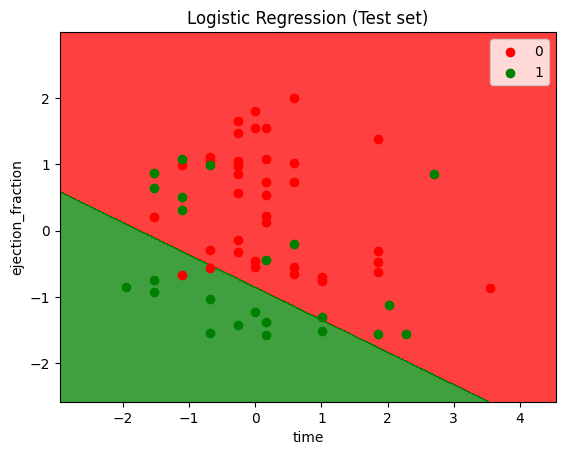

In [ ]:
X_set, y_set = X_test, y_test
X_set, y_set = X_test[:, :2], y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('time')
plt.ylabel('ejection_fraction')
plt.legend()
plt.show()